---
<h1 align='center'><strong>1️⃣Regular expressions `regex` & word tokenization</strong></h1>

---

⭐👉[regexr ~ RegEx Playground](https://regexr.com/)






> This chapter will introduce some basic NLP concepts, such as word tokenization and regular expressions to help parse text. You'll also learn how to handle non-English text and more difficult tokenization you might find.

In [1]:
!git clone https://github.com/mohd-faizy/Natural_Language_Processing_in_Python.git

Cloning into 'Natural_Language_Processing_in_Python'...
remote: Enumerating objects: 139, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 139 (delta 9), reused 17 (delta 5), pack-reused 116
Receiving objects: 100% (139/139), 32.77 MiB | 36.55 MiB/s, done.
Resolving deltas: 100% (42/42), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# plt.style.use('fivethirtyeight')
# plt.style.use('ggplot')
# sns.set_theme()

%matplotlib inline

In [3]:
import nltk

# Download a specific NLTK dataset, e.g., the 'punkt' tokenizer models.
nltk.download('punkt', quiet=True)

# Download the NLTK stopwords dataset, which contains common stopwords for various languages.
nltk.download('stopwords', quiet=True)

# Download the WordNet lexical database, which is used for various NLP tasks like synonym and antonym lookup.
nltk.download('wordnet', quiet=True)

# Download the NLTK averaged perceptron tagger, which is used for part-of-speech tagging.
# nltk.download('averaged_perceptron_tagger', quiet=True)

# Download the NLTK names dataset, which contains a list of common first names and last names.
# nltk.download('names', quit=True)

# Download the NLTK movie_reviews dataset, which contains movie reviews categorized as positive and negative.
# nltk.download('movie_reviews', quit=True)

# Download the NLTK reuters dataset, which is a collection of news documents categorized into topics.
# nltk.download('reuters', quit=True)

# Download the NLTK brown corpus, which is a collection of text from various genres of written American English.
# nltk.download('brown', quit=True)

# Download the 'maxent_ne_chunker' dataset, which is used for Named Entity Recognition.
# nltk.download('maxent_ne_chunker', quiet=True)

# Download the 'words' dataset, which contains a list of common English words.
# nltk.download('words', quiet=True)

True

In [4]:
import re
from pprint import pprint # Used to print data structures in a "pretty" way

In [5]:
os.chdir('/content/Natural_Language_Processing_in_Python/01-Introduction-to-Natural-Language-Processing-in-Python/_datasets')
cwd = os.getcwd()
print('Curent working directory is ', cwd)

Curent working directory is  /content/Natural_Language_Processing_in_Python/01-Introduction-to-Natural-Language-Processing-in-Python/_datasets


In [6]:
ls

 articles.csv            grail.txt            wikipedia_articles/
 english_stopwords.txt   news_articles/      'Wikipedia articles.zip'
 fake_or_real_news.csv  'News articles.zip'


In [7]:
# Import the pprint function from the pprint module
from pprint import pprint

# Define a complex nested dictionary
data = {
    'name': 'John',
    'age': 30,
    'address': {
        'street': '123 Main St',
        'city': 'Exampleville',
        'zipcode': '12345'
    },

}

# Use pprint to print the dictionary in a nicely formatted way
pprint(data)
print('-' * 100)
print(data)

{'address': {'city': 'Exampleville',
             'street': '123 Main St',
             'zipcode': '12345'},
 'age': 30,
 'name': 'John'}
----------------------------------------------------------------------------------------------------
{'name': 'John', 'age': 30, 'address': {'street': '123 Main St', 'city': 'Exampleville', 'zipcode': '12345'}}


# **Introduction to regular expressions**







## Characters

#### Metacharacters

<p align='center'>
	<a href='#'><img src='https://github.com/mohd-faizy/Natural_Language_Processing_in_Python/blob/main/01-Introduction-to-Natural-Language-Processing-in-Python/_img/Metacharacters.png?raw=true'>
    </a>
</p>

#### Special Sequences

A special sequence is a __`\`__ followed by one of the characters in the list below, and has a special meaning:

<p align='center'>
	<a href='#'><img src='https://github.com/mohd-faizy/Natural_Language_Processing_in_Python/blob/main/01-Introduction-to-Natural-Language-Processing-in-Python/_img/Special%20Sequences.png?raw=true'>
    </a>
</p>

#### Sets

<p align='center'>
	<a href='#'><img src='https://github.com/mohd-faizy/Natural_Language_Processing_in_Python/blob/main/01-Introduction-to-Natural-Language-Processing-in-Python/_img/Set.png?raw=true'>
    </a>
</p>

### **Common `regex` Pattern**

$$
\begin{array}{|l|l|l|}
\hline \text { pattern } & \text { matches } & \text { example } \\
\hline \text { \w+ } & \text { word } & \text { 'Magic' } \\
\hline \text { \d } & \text { digit } & 9 \\
\hline \text { \s } & \text { space } & \text { ' ' } \\
\hline \text {.*} & \text { wildcard } & \text { 'username74' } \\
\hline \text { + or }^{*} & \text { greedy match } & \text { 'aaaaaa' } \\
\hline \text { \S } & \text { not space } & \text { 'no_spaces' } \\
\hline \text { [a-z] } & \text { lowercase group } & \text { 'abcdefg' } \\
\hline
\end{array}
$$




In [8]:
import re

text = "The magic number is 42."

matche1 = re.findall(r'\w', text)
matche2 = re.findall(r'\w+', text)

print(matche1)
print(matche2)

['T', 'h', 'e', 'm', 'a', 'g', 'i', 'c', 'n', 'u', 'm', 'b', 'e', 'r', 'i', 's', '4', '2']
['The', 'magic', 'number', 'is', '42']


In [9]:
import re

text = "The answer is 42."
matches = re.findall(r'\d+', text)
print(matches)

['42']


In [10]:
import re

text = "This is a sentence."
matches = re.findall(r'\s', text)
print(matches)

[' ', ' ', ' ']


In [11]:
import re

text = "My username is username74."
matches = re.findall(r'.*', text)
print(matches)

['My username is username74.', '']


In [12]:
import re

text = "aaaaaa"
matche1 = re.findall(r'a+', text)
matche2 = re.findall(r'a*', text)

print(matche1)
print(matche2)

['aaaaaa']
['aaaaaa', '']


In [13]:
import re

text = "This has no_spaces."

matche1 = re.findall(r'\s+', text)
matche2 = re.findall(r'\S+', text)

print(matche1)
print(matche2)

[' ', ' ']
['This', 'has', 'no_spaces.']


In [14]:
import re

text = "Some Lowercase leTTers: abcdefg"

matche1 = re.findall(r'[a-z]+', text)
matche2 = re.findall(r'[A-Za-z]+', text)

print(matche1)
print(matche2)

['ome', 'owercase', 'le', 'ers', 'abcdefg']
['Some', 'Lowercase', 'leTTers', 'abcdefg']


### **Regular vs Raw string?**

In Python, prefixing a string with `r` (e.g., `r"some_string"`) creates a "raw string." Raw strings treat backslashes `(\)` as literal characters and don't interpret them as escape sequences, making them useful for working with regular expressions, file paths, and other cases where backslashes are common and should be treated as-it-is.

In [15]:
string = "\d+"
regular_string = "\\d+"
raw_string = r"\d+"

print(string)
print(regular_string)
print(raw_string)

\d+
\d+
\d+


All three of these strings appear the same. However, there is a difference in how Python interprets and processes them.

- `string = "\d+"`: This is a regular string where the backslash `\` is treated as an escape character. So, \d+ is interpreted as a string containing the characters "d+" because \d is not recognized as a special escape sequence in regular strings.

- `regular_string = "\\d+"`: In this regular string, the double backslash `\\` is used to escape the backslash, so it effectively becomes a single backslash followed by `"d+"`. This is the correct way to represent the regular expression pattern `\d+` in a regular string.

- `raw_string = r"\d+"`: This is a raw string, and the `r` at the beginning tells Python to treat the backslash `\` as a `literal` character. As a result, it represents the string as "\d+" exactly as it appears.

---

The use of raw strings (strings prefixed with r) in Python has several advantages in specific situations:

- **Simplifies Regular Expressions**: Raw strings are often used when working with regular expressions because they prevent the need for double escaping `\\`. This makes regular expression patterns more readable and easier to write correctly.

- **File Paths**: When dealing with file paths in Windows, which often use backslashes (), raw strings can make the code cleaner and more readable. For example, `r'C:\Users\Username\Documents'` is easier to understand than `'C:\\Users\\Username\\Documents'`.

- **Avoids Unintended Escapes**: In some cases, regular strings can interpret backslashes as escape characters even when you don't intend them to be. Raw strings prevent this behavior, ensuring that backslashes are treated as literal characters.


### **RegEx Password Strength Checker**

In [16]:
import re

# Define the regular expression pattern for strong passwords
pattern = r"^(?=.*\d)(?=.*[a-z])(?=.*[A-Z])(?=.*[a-zA-Z]).{8,}$"

# Strong password that meets the criteria
strong_pass = 'StrongP@ssw0rd'
matches_strong = re.findall(pattern, strong_pass)

# Weak password that does not meet the criteria
weak_pass = 'weak123'
matches_weak = re.findall(pattern, weak_pass)

if matches_strong:
    print(f"'{strong_pass}' is a strong password.")
else:
    print(f"'{strong_pass}' is not a strong password.")

if matches_weak:
    print(f"'{weak_pass}' is a strong password.")
else:
    print(f"'{weak_pass}' is not a strong password.")


'StrongP@ssw0rd' is a strong password.
'weak123' is not a strong password.


Regular expression pattern for strong passwords

`pattern = r"^(?=.*\d)(?=.*[a-z])(?=.*[A-Z])(?=.*[a-zA-Z]).{8,}$"`

- `^`: Start of the string.
- `(?=.*\d)`: Requires at least one digit.
- `(?=.*[a-z])`: Requires at least one lowercase letter.
- `(?=.*[A-Z])`: Requires at least one uppercase letter.
- `(?=.*[a-zA-Z])`: Requires at least one letter (either lowercase or uppercase).
- `.{8,}`: Requires a minimum length of 8 characters.
- `$`: End of the string.

## **Python `re` Module**

- **What exactly are regular expression?**
    - A **`RegEx`**, or **Regular Expression** are a sequence of characters that define a search pattern.
    - String with special syntax → **Find all web links in a document**.
    - Allow us to match patterns in other strings → **Parse email addresses**.
    - Applications of regular expression → **Remove/Replace unwanted characters**.


Python `re` module:

- `re.split`
- `re.search`
- `re.match`  
- `re.findall`
- `re.finditer`
- `re.sub`




#### `re.split()`

The `split()` function returns a list where the string has been split at each match.

In [17]:
import re

text = "The rain in Spain"

x = re.split("\s", text)
print(x)

y = re.split("\s", text, maxsplit=1) # specifying the `maxsplit` parameter
print(y)

['The', 'rain', 'in', 'Spain']
['The', 'rain in Spain']


In [18]:
import re

text_corpus = '''Cyclone Dumazile was
                strong tropical cyclone.
                Dumazile originated from a cyclone
                Dyclone low-pressure area that
                formed near USA on 27.
                February. It became a tropical
                disturbance on 2 March, reached
                its peak intensity on 5 March.'''

# Define the regular expression pattern for splitting
pattern = r'\.\s+' # matches a dot (.) followed by one or more whitespace characters (spaces, tabs, newlines, etc.).

# Use re.split() to split the text_corpus
result = re.split(pattern, text_corpus)

# Print the resulting list of substrings
for part in result:
    print(part.strip())

Cyclone Dumazile was
                strong tropical cyclone
Dumazile originated from a cyclone
                Dyclone low-pressure area that
                formed near USA on 27
February
It became a tropical
                disturbance on 2 March, reached
                its peak intensity on 5 March.


#### `re.search()`

- Search for a pattern in a string. It returns a match object if a match is found; otherwise, it returns None.

- If there is **more than one match**, *only the first occurrence of the match will be returned*

In [19]:
text_corpus = '''Cyclone Dumazile was.
                strong tropical cyclone.
                Dumazile originated from a cyclone.
                Dyclone low-pressure area that.
                formed near USA on 27.
                February. It became a tropical.
                disturbance on 2 March, reached.
                its peak intensity on 5 March.'''

In [20]:
import re

pattern  =  r"[A-Z]+yclone"

matchs = re.search(pattern, text_corpus)
print(matchs)

<re.Match object; span=(0, 7), match='Cyclone'>


The Match object has properties and methods used to retrieve information about the search, and the result:

- `.span()`: returns a tuple containing the start-, and end positions of the match.
- `.string`: returns the string passed into the function
- `.group()`: returns the part of the string where there was a match

In [21]:
import re

txt = "The rain in Spain"
x = re.search(r"\bS\w+", txt)
print(x.span())

y = re.search(r"\bS\w+", txt)
print(y.string)

z = re.search(r"\bS\w+", txt)
print(z.group())

(12, 17)
The rain in Spain
Spain


> **Note:** If there is no match, the value ***None*** will be returned, instead of the Match Object.

#### `re.match()`:

Match an entire string or substring based on a pattern.

In [22]:
import re

match = re.match('abc', 'abcdef')
print(match)

<re.Match object; span=(0, 3), match='abc'>


#### `re.finditer()`:

Find all occurrences of the pattern in the string and return them as an iterator of match objects.

In [23]:
# for all first occurrence

pattern  =  r"[A-Z]+yclone"

matches = re.finditer(pattern, text_corpus)

for match in matches:
    print(match)

<re.Match object; span=(0, 7), match='Cyclone'>
<re.Match object; span=(131, 138), match='Dyclone'>


In [24]:
matches = re.finditer(pattern, text_corpus)


for match in matches:
    start, end = match.span()
    print(text_corpus[start:end])

print(match.span())

Cyclone
Dyclone
(131, 138)


#### `findall()`

The `findall()` finds all the pattern in the string.

1. `pattern = r'\.\s+'`: This pattern matches a period `(.)` followed by one or more whitespace characters. It can be used to find sentences in a text.

In [25]:
import re

text = "This is a sentence. This is another sentence."
matches = re.findall(r'\.\s+', text)
print(matches)

['. ']


2. `pattern = r'\d+'`: This pattern matches one or more consecutive digits (0-9). It can be used to find numbers in a text.

In [26]:
import re

text = "The price of the product is $100 and the quantity is 25."
matches = re.findall(r'\d+', text)
print(matches)

['100', '25']


3. `pattern = r'[A-Za-z]+'`: This pattern matches one or more consecutive uppercase or lowercase letters. It can be used to find words in a text.

In [27]:
import re

text = "This is an example text with multiple words."
pattern  = r'[A-Za-z]+'

matches = re.findall(pattern, text)
print(matches)

['This', 'is', 'an', 'example', 'text', 'with', 'multiple', 'words']


4. `pattern = r'\w+'`: This pattern matches one or more word characters (letters, digits, or underscores). It is similar to the previous pattern but includes digits and underscores.

In [28]:
import re

text = "The username is user123 and the email is user@example.com."

matches = re.findall(r'\w+', text)
print(matches)

['The', 'username', 'is', 'user123', 'and', 'the', 'email', 'is', 'user', 'example', 'com']


5. `pattern = r'\s+'`: This pattern matches one or more whitespace characters (spaces, tabs, or line breaks). It can be used to find and split text into separate chunks based on whitespace.

In [29]:
import re

text = "The username is user123 and the email is user@example.com."

matches = re.findall(r'\s+', text)
print(matches)

[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']


6. `pattern = r'\b[A-Z][a-zA-Z]*\b'` is designed to match capitalized words within a text.

In [30]:
import re

text = "This is an Example sentence. It should Match Capitalized words like Apple."
pattern  = r'\b[A-Z][a-zA-Z]*\b'

matches = re.findall(pattern, text)
print(matches)

['This', 'Example', 'It', 'Match', 'Capitalized', 'Apple']


7. `pattern = r'\bword\b'`: This pattern matches the word "word" as a whole word, surrounded by word boundaries. It ensures that "word" is not part of a larger word.

In [31]:
import re

text = "This is a word. It's not a keyword."

matches = re.findall(r'\bword\b', text)
print(matches)

['word']


#### __`re.sub()`__

The `sub()` function replaces the matches with the text of your choice:

In [32]:
import re

string = "The quick brown fox jumps over the lazy dog"

new_string = re.sub("the", "that", string)

print(new_string)

The quick brown fox jumps over that lazy dog


In [33]:
import re

txt = "The#rain#in#Spain#look#beautiful."
x = re.sub("\#", " ", txt) # Replace every white-space character with `_`
print(x)

y = re.sub(pattern="\#", repl=" ", string=txt, count=2)
print(y)

The rain in Spain look beautiful.
The rain in#Spain#look#beautiful.


`re.compile()` function in Python compiles a **regular expression pattern** into a **regular expression object**. This object can then be used to search for matches of the pattern in strings.

In [34]:
import re

mystr = '''Tata Limited
Dr. David Landsman, executive director
18, Grosvenor Place
London SW1X 7HSc
Phone: +44 (20) 7235 8281
Fax: +44 (20) 7235 8727
Email: tata@tata.co.uk
Website: www.europe.tata.com
Directions: View map

Tata Sons, North America
1700 North Moore St, Suite 1520
Arlington, VA 22209-1911
NYC, AV 33209-1211
USA
Phone: +1 (703) 243 9787
Fax: +1 (703) 243 9791
66-66
455-4545
Email: northamerica@tata.com
Website: www.northamerica.tata.com
Directions: View map fass
harry potter lekin
bahut hi badia aadmi haiaiinaiiiiiiiiiiii'''

# findall, search, split, sub, finditer
# pattern = re.compile(r'fass')
# pattern = re.compile(r'.adm')
# pattern = re.compile(r'^Tata')
# pattern = re.compile(r'iin$')
# pattern = re.compile(r'ai{2}')
# pattern = re.compile(r'(ai){1}')
# pattern = re.compile(r'ai{1}|Fax')


# -------Special Sequences-----
# pattern = re.compile(r'Fax\b')
# pattern = re.compile(r'27\b')

pattern = re.compile(r'\d{5}-\d{4}') # matches a string of five digits followed by a dash followed by four digits

matches = pattern.finditer(mystr)

for match in matches:
    print(match)

<re.Match object; span=(284, 294), match='22209-1911'>
<re.Match object; span=(303, 313), match='33209-1211'>


## **What is Natural Language Processing?**

- **Field of study focused on making sense of language**
    - Using statistics and computers

- **Basics of NLP**
    - ***Topic identification***
    - ***Text classification***

- [__NLP applications include__](https://www.analyticsvidhya.com/blog/2020/07/top-10-applications-of-natural-language-processing-nlp/)
    - ***Search Autocorrect and Autocomplete***
    - ***Language Translator***
    - ***Social Media Monitoring***
    - ***Chatbots***
    - ***Survey Analysis***
    - ***Sentiment analysis***
    - ***Targeted Advertising***
    - ***Hiring and Recruitment***
    - ***Voice Assistants***
    - ***Grammar Checkers***
    - ***Email Filtering***


In [35]:
my_string = "Let's write RegEx!"
PATTERN = r"\w+"
re.findall(PATTERN, my_string)

['Let', 's', 'write', 'RegEx']

### Practicing regular expressions - `re.split()` and `re.findall()`
Now you'll get a chance to write some regular expressions to match digits, strings and non-alphanumeric characters. Take a look at `my_string` first by printing it in the IPython Shell, to determine how you might best match the different steps.

>**Note**: It's important to prefix your regex patterns with `r` to ensure that your patterns are interpreted in the way you want them to. Else, you may encounter problems to do with escape sequences in strings. For example, `"\n"` in Python is used to indicate a new line, but if you use the `r` prefix, it will be interpreted as the raw string `"\n"` - that is, the character `"\"` followed by the character `"n"` - and not as a new line.

Remember that the syntax for the regex library is to always to pass the **pattern first**, and then the **string second**.

In [36]:
my_string = "Let's write RegEx!  Won't that be fun?  I sure think so.  Can you find 4 sentences?  Or perhaps, all 19 Words?"

In [37]:
# Write a pattern to match sentence endings: sentence_endings
sentence_endings = r"[.?!]"

# Split my_string on sentence endings and print the result
print(re.split(sentence_endings, my_string))

# Find all capicalized words in my_string and print the result
capitalized_words = r"[A-Z]\w+"
print(re.findall(capitalized_words, my_string))

# Split my_string on spaces and print the result
spaces = r"\s+"
print(re.split(spaces, my_string))

# Find all digits in my_string and print the result
digits = r"\d+"
print(re.findall(digits, my_string))

["Let's write RegEx", "  Won't that be fun", '  I sure think so', '  Can you find 4 sentences', '  Or perhaps, all 19 Words', '']
['Let', 'RegEx', 'Won', 'Can', 'Or', 'Words']
["Let's", 'write', 'RegEx!', "Won't", 'that', 'be', 'fun?', 'I', 'sure', 'think', 'so.', 'Can', 'you', 'find', '4', 'sentences?', 'Or', 'perhaps,', 'all', '19', 'Words?']
['4', '19']


# **Introduction to tokenization**

- **Tokenization**
    - Turning a string or document into **tokens** (smaller chunks)
    - One step in preparing a text for NLP
    - Many different theories and rules
    - You can create your own rules using regular expressions
    - Some examples:
        - Breaking out words or sentences
        - Separating punctuation
        - Separating all hashtags in a tweet

- **Why tokenize?**

    - Easier to map part of speech
    - Matching common words
    - Removing unwanted tokens

**NLTK** (Natural Language Toolkit) is a Python library commonly used in NLP for various tasks, including tokenization.
- Other `nltk` tokenizers:

    - **`word_tokenize`**: Tokenize text into words while handling punctuation.
    ```python
    from nltk.tokenize import word_tokenize
    text = "This is a sample sentence."
    tokens = word_tokenize(text)
    # Output: ['This', 'is', 'a', 'sample', 'sentence', '.']
    ```

    - **`sent_tokenize`**: Tokenize a document into individual sentences.
    ```python
    from nltk.tokenize import sent_tokenize
    text = "This is a sample sentence. And another one."
    sentences = sent_tokenize(text)
    # Output: ['This is a sample sentence.', 'And another one.']
    ```

    - **`RegexpTokenizer`**: Tokenize text using custom regular expressions to define token patterns.
    ```python
    from nltk.tokenize import RegexpTokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    text = "This is a sample sentence with123numbers."
    tokens = tokenizer.tokenize(text)
    # Output: ['This', 'is', 'a', 'sample', 'sentence', 'with123numbers']
    ```

    - **`WhitespaceTokenizer`**: Tokenize a text based on whitespace characters (e.g., spaces, tabs, newlines).

    ```python
    from nltk.tokenize import WhitespaceTokenizer
    tokenizer = WhitespaceTokenizer()
    text = "This is a sample sentence."
    tokens = tokenizer.tokenize(text)
    # Output: ['This', 'is', 'a', 'sample', 'sentence.']
    ```

    - **`TweetTokenizer`**: Specialized class for tweet tokenization, allowing you to     separate hashtags, mentions, and special characters commonly found in tweets.
    ```python
    from nltk.tokenize import TweetTokenizer
    tokenizer = TweetTokenizer()
    tweet = "Just found an amazing article on #NLP! Check it out at https://example.com #MachineLearning"

    tokens = tokenizer.tokenize(tweet)
    print(tokens)
    # Output: ['Just', 'found', 'an', 'amazing', 'article', 'on', '#NLP', '!', 'Check', 'it', 'out', 'at', 'https://example.com', '#MachineLearning']

    ```


In [38]:
import nltk
nltk.download('punkt')  # Download the necessary data (only need to do this once)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
from nltk.tokenize import word_tokenize

sentence = "Hi there!"
tokens = word_tokenize(sentence)
print(tokens)

['Hi', 'there', '!']


### **Word tokenization with NLTK**

Here, you'll be using the first scene of Monty Python's Holy Grail, which has been pre-loaded as `scene_one`.

Your job in this exercise is to utilize `word_tokenize` and `sent_tokenize` from `nltk.tokenize` to tokenize both words and sentences from Python strings - in this case, the first scene of Monty Python's Holy Grail.

> Note: Before using NLTK, you must install `punkt` package for tokenizer

In [40]:
with open('grail.txt', 'r') as file:
    holy_grail = file.read()
    scene_one = re.split('SCENE 2:', holy_grail)[0]

In [41]:
scene_one

"SCENE 1: [wind] [clop clop clop] \nKING ARTHUR: Whoa there!  [clop clop clop] \nSOLDIER #1: Halt!  Who goes there?\nARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!\nSOLDIER #1: Pull the other one!\nARTHUR: I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.\nSOLDIER #1: What?  Ridden on a horse?\nARTHUR: Yes!\nSOLDIER #1: You're using coconuts!\nARTHUR: What?\nSOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.\nARTHUR: So?  We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--\nSOLDIER #1: Where'd you get the coconuts?\nARTHUR: We found them.\nSOLDIER #1: Found them?  In Mercea?  The coconut's tropical!\nARTHUR: What do you mean?\nSOLDIER #1: Well, this is a t

In [42]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

# Split scene_one into sentences: sentences
sentences = sent_tokenize(scene_one)
print(sentences[2])

# Use word_tokenize to tokenize the fourth sentence: tokenized_sent
tokenized_sent = word_tokenize(sentences[2])
print(tokenized_sent)

# Make a set of unique tokens in the entire scene: unique_tokens
unique_tokens = set(word_tokenize(scene_one))

# Print the unique tokens result
# pprint(unique_tokens)
print(unique_tokens)

Who goes there?
['Who', 'goes', 'there', '?']
{'ratios', 'speak', 'No', 'my', 'he', 'African', 'servant', 'Yes', 'seek', 'who', 'lord', 'Are', 'migrate', 'from', 'England', 'not', 'it', 'five', 'needs', 'bring', 'empty', 'You', 'where', 'castle', 'grips', 'Patsy', 'is', 'go', 'Not', 'SOLDIER', 'times', 'using', 'European', 'Wait', 'ARTHUR', 'be', 'guiding', 'dorsal', 'Supposing', 'line', 'sovereign', 'interested', "'m", 'swallows', 'minute', '--', 'Ridden', 'ounce', 'through', 'wings', 'its', 'non-migratory', 'beat', 'by', 'get', 'held', 'yeah', 'but', 'That', 'Pendragon', 'under', 'sun', 'Saxons', 'one', ':', 'Court', 'they', 'Found', 'back', 'found', 'then', 'the', '.', 'halves', 'that', 'knights', 'wants', 'temperate', 'are', 'Please', "'ve", 'Listen', 'winter', 'anyway', 'I', "'re", 'goes', 'grip', 'weight', 'could', 'warmer', 'or', 'feathers', 'Where', 'pound', 'ridden', 'length', 'me', 'these', 'Halt', 'this', 'plover', 'of', 'a', 'climes', 'husk', '[', 'have', 'matter', 'them', 

### More regex with `re.search()`

In this exercise, you'll utilize `re.search()` and `re.match()` to find specific tokens. Both search and match expect regex patterns, similar to those you defined in an earlier exercise. You'll apply these regex library methods to the same Monty Python text from the `nltk` corpora.



In [43]:
# Search for the first occurrence of "coconuts" in scene_one: match
match = re.search("coconuts", scene_one)

# Print the start and end indexes of match
print(match.start(), match.end())

580 588


In [44]:
# Write a regular expression to search for anything in square brackets: pattern1
pattern1 = r"\[.*\]" # will match any string that contains square brackets,
                     # with any characters (or none) in between them.
                     # For example, it would match strings like "[abc]", "[123]", "[ ]", and even just "[]".

# Use re.search to find the first text in square brackets
print(re.search(pattern1, scene_one))

<re.Match object; span=(9, 32), match='[wind] [clop clop clop]'>


In [45]:
# Find the script notation at the beginning of the fourth sentence and print it
pattern2 = r"[\w\s]+:" # will match strings that have one or more word characters
                       # or whitespace characters followed by a colon.
                       # For example, it would match strings like "word1:", "word_2:", " word3:", and so on.

print(re.match(pattern2, sentences[3]))

<re.Match object; span=(0, 7), match='ARTHUR:'>


- Difference between `re.search()` and `re.match()`?
    - `re.search()` searches throughout the entire string, while `re.match()` only checks for a match at the beginning of the string.



In [46]:
import re

text = "apple orange banana"
pattern = r"orange"

result = re.search(pattern, text)

if result:
    print("Found:", result.group())
else:
    print("Not found")

Found: orange


In [47]:
import re

text = "apple orange banana"
pattern = r"orange"

result = re.match(pattern, text)

if result:
    print("Found:", result.group())
else:
    print("Not found")

Not found


# **Advanced tokenization with NLTK and regex**

- Regex groups using or `|`
    - OR is represented using `|` pipe operator.
    - You can define a group using `()`
    - You can define explicit character ranges using `[]`

- Regex ranges and groups

\begin{array}{|l|l|l|}
\hline \text{Pattern} & \text{Matches} & \text{Example} \\
\hline [A-Za-z]+ & \text{Upper and lowercase English alphabet} & 'ABCDEFghijk' \\
\hline [0-9] & \text{Numbers from 0 to 9} & 9 \\
\hline [A-Za-z\-\.]+ & \text{Upper and lowercase English alphabet, - and .} & 'My-Website.com' \\
\hline (a-z) & \text{a, - and z} & 'a-z' \\
\hline (\s+|,) & \text{Spaces or a comma} & ', ' \\
\hline
\end{array}




### Choosing a tokenizer


Given the following string, which of the below patterns is the best tokenizer? If possible, you want to retain sentence punctuation as separate tokens, but have `'#1'` remain a single token.
```python
my_string = "SOLDIER #1: Found them? In Mercea? The coconut's tropical!"
```

Additionally, `regexp_tokenize` has been imported from `nltk.tokenize`. You can use `regexp_tokenize(string, pattern)` with `my_string` and one of the patterns as arguments to experiment for yourself and see which is the best tokenizer.

In [48]:
import re

my_str = 'match lowercase spaces nums like 12, but no commas'

re.match('[a-z0-9 ]+', my_str)

<re.Match object; span=(0, 35), match='match lowercase spaces nums like 12'>

In [49]:
from nltk.tokenize import regexp_tokenize

my_string = "SOLDIER #1: Found them? In Mercea? The coconut's tropical!"

pattern = r"(\w+|#\d|\?|!)"

pprint(regexp_tokenize(my_string, pattern))

['SOLDIER',
 '#1',
 'Found',
 'them',
 '?',
 'In',
 'Mercea',
 '?',
 'The',
 'coconut',
 's',
 'tropical',
 '!']


 The regex pattern `(\w+|#\d|\?|!)` will match any of the following:

- One or more word characters (letters, digits, underscores).
- A hash symbol `'#'` followed by a single digit.
- A question mark `'?'`.
- An exclamation mark '`!'`.

### Regex with NLTK tokenization
Twitter is a frequently used source for NLP text and tasks. In this exercise, we'll build a more complex tokenizer for tweets with hashtags and mentions using nltk and regex. The `nltk.tokenize.TweetTokenizer` class gives you some extra methods and attributes for parsing tweets.

Here, you're given some example tweets to parse using both `TweetTokenizer` and `regexp_tokenize` from the `nltk.tokenize` module.

Unlike the syntax for the regex library, with `nltk_tokenize()` you pass the pattern as the second argument.

In [50]:
tweets = ['This is the best #nlp exercise ive found online! #python',
          '#NLP is super fun! <3 #learning',
          'Thanks @nlp_ai :) #nlp #python']

In [51]:
# Import the necessary modules
from nltk.tokenize import regexp_tokenize, TweetTokenizer

# Define a regex pattern to find hashtags: pattern1
pattern1 = r"#\w+"

# Use the pattern on the first tweet in the tweets list
hashtags = regexp_tokenize(tweets[0], pattern1)
print(hashtags)

['#nlp', '#python']


In [52]:
# Import the necessary modules
from nltk.tokenize import regexp_tokenize, TweetTokenizer

# write a pattern that matches both mentions (@) and hashtags
pattern2 = r"[@|#]\w+"

# Use the pattern on the last tweet in the tweets list
mentions_hashtags = regexp_tokenize(tweets[-1], pattern2)
print(mentions_hashtags)

['@nlp_ai', '#nlp', '#python']


In [53]:
# Use the TweetTokenizer to tokenize all tweets into one list
tokenizer = TweetTokenizer()
all_tokens = [tokenizer.tokenize(t) for t in tweets]
print(all_tokens)

[['This', 'is', 'the', 'best', '#nlp', 'exercise', 'ive', 'found', 'online', '!', '#python'], ['#NLP', 'is', 'super', 'fun', '!', '<3', '#learning'], ['Thanks', '@nlp_ai', ':)', '#nlp', '#python']]



### **Non-ascii tokenization**

In this exercise, we'll practice advanced tokenization by tokenizing some **non-ascii** based text. we'll be using German with emoji!

Here, we have access to a string called `german_text`, which has been printed for hy.

Unicode ranges for emoji are:

`('\U0001F300'-'\U0001F5FF')`, `('\U0001F600-\U0001F64F')`, `('\U0001F680-\U0001F6FF')`, and `('\u2600'-\u26FF-\u2700-\u27BF')`.

In [54]:
german_text = 'Wann gehen wir Pizza essen? 🍕 Und fährst du mit Über? 🚕'

In [55]:
# Import the necessary modules
from nltk.tokenize import word_tokenize

# Tokenize and print all words in german_text
all_words = word_tokenize(german_text)
print(all_words)

# Tokenize and print only capital words
pattern = r"[A-ZÜ]\w+"
token_capital_word = regexp_tokenize(german_text, pattern)
print(token_capital_word)

# Tokenize and print only emoji
emoji = "['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF']"
tokenize_emoji = regexp_tokenize(german_text, emoji)
print(tokenize_emoji)

['Wann', 'gehen', 'wir', 'Pizza', 'essen', '?', '🍕', 'Und', 'fährst', 'du', 'mit', 'Über', '?', '🚕']
['Wann', 'Pizza', 'Und', 'Über']
['🍕', '🚕']


['This', 'is', 'a', 'pretty', 'cool', 'tool', '!']
[4, 2, 1, 6, 4, 4, 1]


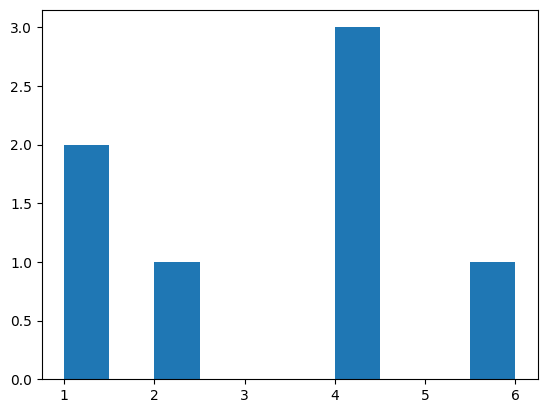

In [56]:
from matplotlib import pyplot as plt
from nltk.tokenize import word_tokenize

words = word_tokenize("This is a pretty cool tool!")
print(words)

word_lengths = [len(w) for w in words]
print(word_lengths)

plt.hist(word_lengths)
plt.show()

# **Charting word length with NLTK**


['This', 'is', 'a', 'pretty', 'cool', 'tool', '!']
[4, 2, 1, 6, 4, 4, 1]


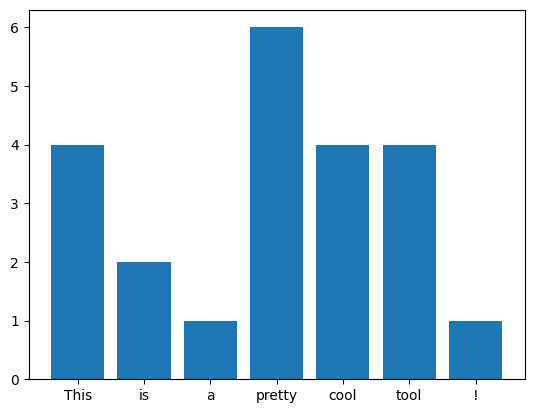

In [57]:
from matplotlib import pyplot as plt
from nltk.tokenize import word_tokenize

words = word_tokenize("This is a pretty cool tool!")
print(words)

word_lengths = [len(w) for w in words]
print(word_lengths)

# Plot the histogram with custom x-axis labels and positions
plt.bar(range(len(word_lengths)), word_lengths)
plt.xticks(range(len(word_lengths)), words)  # Set custom x-axis labels

# Show the plot
plt.show()

### Charting practice
Try using your new skills to find and chart the number of words per line in the script using matplotlib. The Holy Grail script is loaded for you, and you need to use regex to find the words per line.

Using list comprehensions here will speed up your computations. For example: `my_lines = [tokenize(l) for l in lines]` will call a function tokenize on each line in the list lines. The new transformed list will be saved in the `my_lines` variable.

This regular expression pattern `[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:` can be described as follows:

- `[A-Z]{2,}`: Match two or more uppercase letters (A-Z) consecutively.
- `(\s)?`: Match zero or one whitespace character.
- `(#\d)?`: Match zero or one occurrence of a pound sign (#) followed by a single digit (0-9).
- `([A-Z]{2,})?`: Match zero or one occurrence of two or more uppercase letters - (A-Z) consecutively.
- `:` : Match a colon followed by a double quotation mark.

This regex pattern is designed to match a sequence of uppercase letters (2 or more) followed by an optional whitespace, an optional pound sign followed by a digit, and an optional sequence of uppercase letters (2 or more) followed by a colon and a double quotation mark.

- The regular expression pattern `"[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:"` is used to match speaker labels of the form `"SPEAKER:"` or `"SPEAKER #N:"` where **SPEAKER** is represented by **uppercase letters**.

- The `re.sub(pattern, '', line)` function is used to `replace` any matched speaker labels with an `empty string` `''` for each line in the lines list.

>This effectively removes the speaker labels.

In [58]:
with open('grail.txt', 'r') as file:
    holy_grail = file.read()

['SCENE 1: [wind] [clop clop clop] ', ' Whoa there!  [clop clop clop] ', ' Halt!  Who goes there?', ' It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!', ' Pull the other one!', ' I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.', ' What?  Ridden on a horse?', ' Yes!', " You're using coconuts!", ' What?', " You've got two empty halves of coconut and you're bangin' 'em together.", ' So?  We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--', " Where'd you get the coconuts?", ' We found them.', " Found them?  In Mercea?  The coconut's tropical!", ' What do you mean?', ' Well, this is a temperate zone.', ' The swallow may fly south with the sun or the house martin or the plover may seek warmer climes i

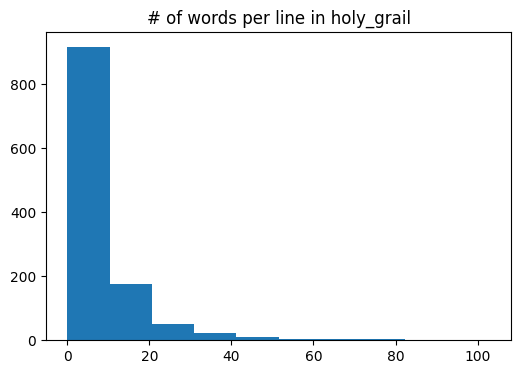

In [59]:
import matplotlib.pyplot as plt

# Split the script into lines: lines
lines = holy_grail.split('\n')

# Replace all script lines for speaker
pattern = "[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:"



new_lines = []
for line in lines:
    new_line = re.sub(pattern, '', line)
    new_lines.append(new_line)
print(new_lines)


# Tokenize each line: tokenized_lines
tokenized_lines = []
for line in new_lines:
    tokens = regexp_tokenize(line, '\w+')
    tokenized_lines.append(tokens)

print(tokenized_lines)

# Make a frequency list of lengths: line_num_words
line_num_words = []
for t_line in tokenized_lines:
    num_words = len(t_line)
    line_num_words.append(num_words)

print(line_num_words)

# Plot a histogram of the line lengths
plt.figure(figsize=(6, 4))
plt.hist(line_num_words)
plt.title('# of words per line in holy_grail')
plt.show()

**Using List Comprehension**

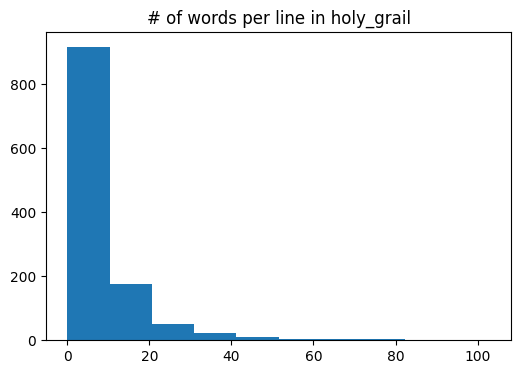

In [60]:
import matplotlib.pyplot as plt
import re  # Import the regular expressions library
from nltk.tokenize import regexp_tokenize

# Split the script into lines: lines
lines = holy_grail.split('\n')

# Define a regular expression pattern to match speaker lines (e.g., ARTHUR:, SOLDIER #1:)
pattern = "[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:"

# Use a list comprehension to remove speaker lines and retain dialogue lines
lines = [re.sub(pattern, '', l) for l in lines]

# Tokenize the dialogue lines using regexp_tokenize(), keeping only words
# The pattern "\w+" matches words
tokenized_lines = [regexp_tokenize(s, '\w+') for s in lines]

# Create a list containing the number of words in each dialogue line
line_num_words = [len(t_line) for t_line in tokenized_lines]

# Create a histogram of the line lengths
plt.figure(figsize=(6, 4))  # Set the figure size
plt.hist(line_num_words)  # Create the histogram
plt.title('# of words per line in holy_grail')  # Set the title
plt.show()  # Display the plot


#### $\color{skyblue}{\textbf{Connect with me:}}$


[<img align="left" src="https://cdn4.iconfinder.com/data/icons/social-media-icons-the-circle-set/48/twitter_circle-512.png" width="32px"/>][twitter]
[<img align="left" src="https://cdn-icons-png.flaticon.com/512/145/145807.png" width="32px"/>][linkedin]
[<img align="left" src="https://cdn2.iconfinder.com/data/icons/whcompare-blue-green-web-hosting-1/425/cdn-512.png" width="32px"/>][Portfolio]

[twitter]: https://twitter.com/F4izy
[linkedin]: https://www.linkedin.com/in/mohd-faizy/
[Portfolio]: https://mohdfaizy.com/


---


### Other Examples `Regex`

**Regex for phone numbers**

>starts with `8` or `9` and total digits equal to `10`

In [61]:
import re

# Sample list of phone numbers
phone_numbers = [
    "8123456789",
    "9123456780",
    "7123456789",
    "812345678",
    "91234567891",
    "8X23456789",
]

# Regular expression pattern (both pattern works fine)
pattern = r"^[89]\d{9}$"
# pattern = r"[89][0-9]{9}"

# Iterate through the phone numbers and check if they match the pattern
for number in phone_numbers:
    if re.match(pattern, number):
        print(f"Valid mobile number: {number}")
    else:
        print(f"Invalid mobile number: {number}")

Valid mobile number: 8123456789
Valid mobile number: 9123456780
Invalid mobile number: 7123456789
Invalid mobile number: 812345678
Invalid mobile number: 91234567891
Invalid mobile number: 8X23456789


The regular expression pattern `r"^[A-Z][a-zA-Z]*\d[a-zA-Z]*$"` matches strings that follow a specific pattern. Let's break down each part of the pattern:

- `^`: This symbol signifies the start of the string.

- `[A-Z]`: This part matches an uppercase letter from 'A' to 'Z' at the beginning of the string.

- `[a-zA-Z]*`: This part matches zero or more lowercase or uppercase letters.

- `\d`: This matches a single digit (0-9).

- `[a-zA-Z]*`: This part again matches zero or more lowercase or uppercase letters.

- `$`: This symbol signifies the end of the string.

In [62]:
import re

# Sample list of strings
strings = [
    "Hello5World",
    "Aa1b",
    "Xyz0z",
    "AbC",     # Invalid (no digit)
    "123abc",  # Invalid (no uppercase letter)
    "Aa2b3c",  # Invalid (more than one digit)
    "aA2b3c"   # Invalid (no uppercase in the beginning)
]

# Regular expression pattern
pattern = r"^[A-Z][a-zA-Z]*\d[a-zA-Z]*$"

# Iterate through the strings and check if they match the pattern
for string in strings:
    if re.match(pattern, string):
        print(f"Valid string: {string}")
    else:
        print(f"Invalid string: {string}")

Valid string: Hello5World
Valid string: Aa1b
Valid string: Xyz0z
Invalid string: AbC
Invalid string: 123abc
Invalid string: Aa2b3c
Invalid string: aA2b3c


**Regex pattern for matching email addresses:**

pattern = `^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$`

- `^`: Start of the string.
- `[a-zA-Z0-9._%+-]+`: Match one or more characters that can appear in the username part of the email address. This includes letters (both uppercase and lowercase), digits, and special characters like `"."`, `"_"`, `"%"`, `"+"`, and `"-"`.
- `@`: Match the "@" symbol, which separates the username from the domain.
- `[a-zA-Z0-9.-]+`: Match one or more characters that can appear in the domain name part of the email address. This includes letters (both uppercase and lowercase), digits, ".", and "-".
- `\.`: Match the dot that separates the domain name from the top-level domain (TLD).
- `[a-zA-Z]{2,}`: Match the TLD, which consists of at least two letters.
- `$`: End of the string.

In [63]:
import re

# Define the regex pattern for matching email addresses
email_pattern = r'[a-zA-z0-9_\-\.]+[@]+[\.][a-z]{2,3}'                   # from YTD
# email_pattern = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,3}$'

# Function to validate an email address
def is_valid_email(email):
    if re.match(email_pattern, email):
        return True
    else:
        return False

# Test the function with some example email addresses
emails = [
    "user@example.com",
    "name.lastname@example.co.",
    "invalid-email",
    "another.invalid.email@.com"
]

for email in emails:
    if is_valid_email(email):
        print(f"{email} is a valid email address.")
    else:
        print(f"{email} is not a valid email address.")

user@example.com is not a valid email address.
name.lastname@example.co. is not a valid email address.
invalid-email is not a valid email address.
another.invalid.email@.com is a valid email address.
